# Tweeter Sentiment Generator 

## Libraries

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud

# Text Processing 
import re 
import string 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# NLP Utilities 
# Download the WordNet resource
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Model Persistence 
import joblib

# Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Find Main Working Directory
import sys
import os
sys.path.append(os.path.join(os.path.abspath('..')))

In [3]:
# Import module
import scripts.eda as ed

In [4]:
# Load the dataset 
df_train = pd.read_csv('../data/raw/twitter_training.csv')
df_test = pd.read_csv('../data/raw/twitter_validation.csv')

In [5]:
# View the head of train data
df_train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
# View head of validation data 
df_test.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [7]:
# Concatenate Data 
df = pd.concat([df_train, df_test], ignore_index=False)

In [8]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN,NaN
1,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,NaN,NaN
2,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN,NaN,NaN
3,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN,NaN,NaN
4,2401.0,Borderlands,Positive,im getting into borderlands and i can murder y...,NaN,NaN,NaN,NaN


## Explore The Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75680 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                              --------------  -----  
 0   2401                                                                                                                                                                                                                                                74681 non-null  float64
 1   Borderlands                                                                

### Rename the Columns 

In [10]:
df = df.drop(columns=['2401', 
                      '3364', 
                      'Facebook', 
                      'Irrelevant', 
                      'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'])


In [11]:
# View the data head 
df.head()

,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [12]:
# Add Headers
df.columns = ['Branch', 'Sentiment', 'Tweet']

# Reset the index to ensure the first row is included as data
df.reset_index(drop=True, inplace=True)

# Display the first few rows
df.head()

,Branch,Sentiment,Tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [13]:
df.shape

(75680, 3)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75680 entries, 0 to 75679
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Branch     74681 non-null  object
 1   Sentiment  74681 non-null  object
 2   Tweet      73995 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [15]:
# Check duplicate Values
df.duplicated().sum()

np.int64(4619)

In [16]:
# Drop duplicate values
df = df.drop_duplicates()

In [17]:
# Check duplicate values
df.duplicated().sum()

np.int64(0)

In [18]:
# Check missing values
df.isnull().sum()

Branch         1
Sentiment      1
Tweet        104
dtype: int64

In [19]:
# Drop missing values
df.dropna(inplace=True)

In [20]:
# Check missing values 
df.isnull().sum()

Branch       0
Sentiment    0
Tweet        0
dtype: int64

### 1. Sentiment Distribution
Let's see how the sentiments are distributed in your dataset.

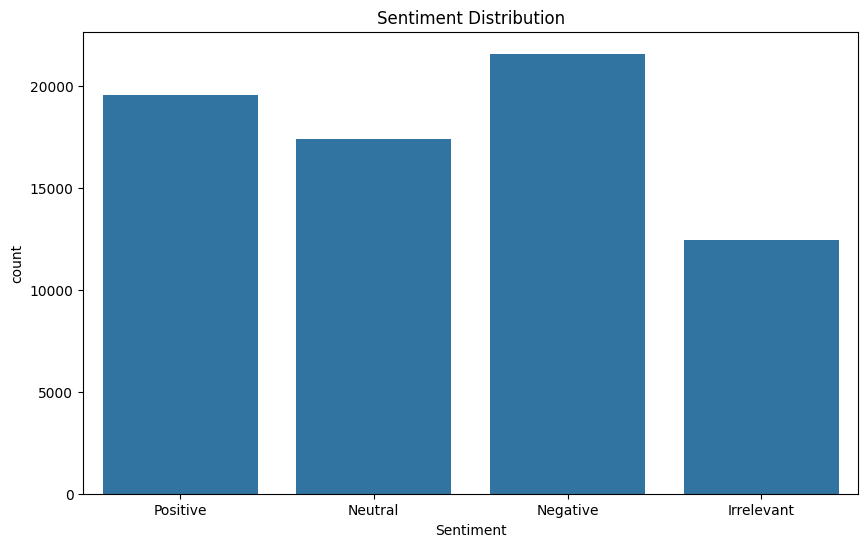

In [25]:
# Sentiment Distribution
ed.sentiment_distribution(df, 'Sentiment')

### 2. Most common words in tweet
A WordCloud can give us a beautiful visual of the most common words in the tweets.

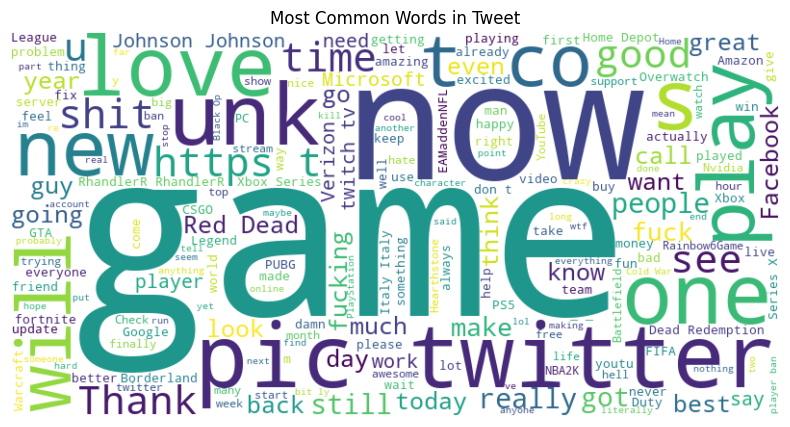

In [26]:
# Most common words 
ed.plot_wordcloud(df, 'Tweet')


### 3. Branch Sentiment Analysis
A cross table plot to see the sentiment distribution across different branches.

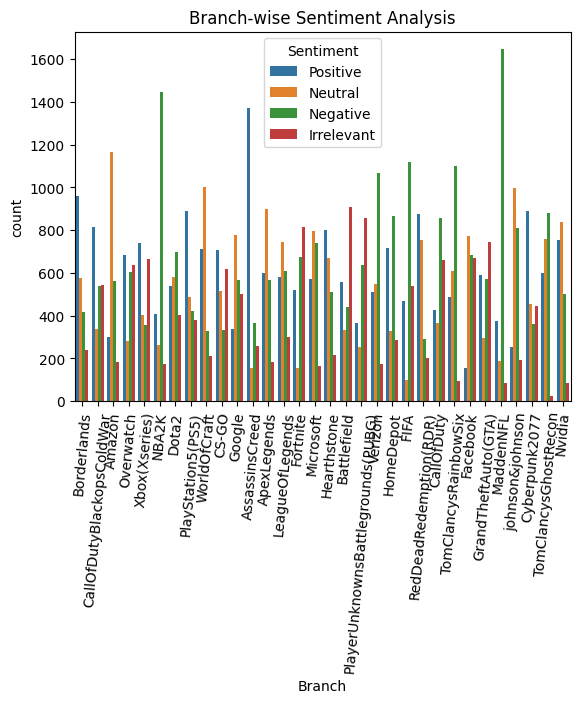

In [33]:
# Plot cross table
ed.plot_branch_sentiment(df, 'Branch', 'Sentiment')